# Neural Networks

**Name**: Maria Gabriela Ayala

In [5]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Test PyTorch installation
import torch 

torch.manual_seed(1234)

Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

### Part 1
Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

Considering the following simple activation function:

$$ f(z) = 
\begin{cases}  
    1 \text{ if }  z\geq 0 \\ 
    0 \text{ if }  z\leq 0 
\end{cases}$$


1. $\; \texttt{NOT } x_1$

With w = (-1, 0) and b = 0.5 we can do the following calculations:

$ \texttt{x = (0,0):} $    
$\\ z = (x \cdot w) + b 
\rightarrow z = (0 * -1) + (0 * 0) + 0.5
\rightarrow z = 0.5 
\rightarrow f(0.5) = 1$

$\texttt{x = (0,1):} $  
$\\ z = (0 * -1) + (1 * 0) + 0.5 
\rightarrow z = 0.5 
\rightarrow f(0.5) = 1$

$\texttt{x = (1,0):} $  
$\\ z = (1 * -1) + (0 * 0) + 0.5
\rightarrow z = -1 + 0.5
\rightarrow f(-0.5) = 0$

$\texttt{x = (1,1):} $  
$\\ z = (1 * -1) + (1 * 0) + 0.5
\rightarrow z = -1 + 0.5
\rightarrow  f(-0.5) = 0$

As a result, we obtain:

|$x_1$|0|0|1|1|
|:------:|:------------:|:---:|:---:|:---:|
|$x_2$|0|1|0|1|
|$ x_1 \texttt { NOT } x_2$|1|1|0|0|

$\\ \rightarrow$ The NOT logic gate can be learned with a single-layer perceptron because the input classes are linearly separable.

2. $\; \texttt{ NAND } x_1$

With w = (-3, -1) and b = 3 we can do the following calculations:

$ \texttt{x = (0,0):} $
$\\ z = (x \cdot w) + b
\rightarrow z = (0 * -3) + (0 * -1) + 3
\rightarrow z = 3
\rightarrow  f(3) = 1$

$ \texttt{x = (0,1):} $  
$\\ z = (0 * -3) + (1 * -1) + 3
\rightarrow z = -1 + 3
\rightarrow f(2) = 1$

$ \texttt{x = (1,0):} $  
$\\ z = (1 * -3) + (0 * -1) + 3
\rightarrow z = -3 + 3
\rightarrow f(0) = 1$

$ \texttt{x = (1,1):} $  
$\\ z = (1 * -3) + (1 * -1) + 3
\rightarrow z = -3 - 1 + 3
\rightarrow f(-1) = 0$


We get:

|$x_1$|0|0|1|1|
|:---:|:---:|:---:|:---:|:---:|
|$x_2$|0|1|0|1|
|$ x_1 \texttt { NAND } x_2$|1|1|1|0|

$\\ \rightarrow$ The NAND logic gate can also be learned with a single-layer perceptron because the input classes are linearly separable.



3. $\; x_1 \texttt{ XNOR } x_2$ 

The XNOR logic gate consists of (1) an $\; x_1 \texttt{ AND } x_2$ gate, a $\; x_1 \texttt{ NOR } x_2$ gate and an $\; x_1 \texttt{ OR } x_2$. To get to XNOR, we have to go through each of these steps.

![xnor](figs/xnor.png)
    
(1) First, calculate the $\; x_1 \texttt{ AND } x_2$ gate for each of the four possible combinations of $x_1$ and $x_2$:
    
With w = (1, 1) and b = - 2: 

$ \texttt{x = (0,0):} $ 
$\\ z = (0 * 1) + (0 * 1) - 2
\rightarrow z = -2
\rightarrow f(-2) = 0$

$ \texttt{x = (0,1):} $  
$\\ z = (0 * 1) + (1 * 1) - 2
\rightarrow z = 1 - 2
\rightarrow f(-1) = 0$

$ \texttt{x = (1,0):} $  
$\\ z = (1 * 1) + (0 * 1) - 2
\rightarrow z = 1 - 2
\rightarrow f(-1) = 0$

$ \texttt{x = (1,1):} $  
$\\ z = (1 * 1) + (1 * 1) - 2
\rightarrow z = 1 + 1 - 2
\rightarrow f(0) = 1$

We get:

|$x_1$|0|0|1|1|
|:------:|:------------:|:---:|:---:|:---:|
|$x_2$|0|1|0|1|
|$ x_1 \texttt { AND } x_2$|0|0|0|1|



(2) Then we calculate the $\; x_1 \texttt{ NOR } x_2$ gate for each of the four possible combinations of $x_1$ and $x_2$:

With w = (-3, -3) and b = 2: 

$ \texttt{x = (0,0):} $ 
$\\ z = (0 * -3) + (0 * -3) + 2
\rightarrow z = 2
\rightarrow f(2) = 1$

$ \texttt{x = (0,1):} $ 
$\\ z = (0 * -3) + (1 * -3) + 2
\rightarrow z = -3 + 2
\rightarrow f(-1) = 0$

$ \texttt{x = (1,0):} $  
$z = (1 * -3) + (0 * -3) + 2
\rightarrow z = -3 + 2
\rightarrow f(-1) = 0$

$ \texttt{x = (1,1):} $  
$\\ z = (1 * -3) + (1 * -3) + 2
\rightarrow z = -3 - 3 + 2
\rightarrow f(-4) = 0$

We get:

|$x_1$|0|0|1|1|
|:------:|:------------:|:---:|:---:|:---:|
|$x_2$|0|1|0|1|
|$ x_1 \texttt { NOR } x_2$|1|0|0|0|


(3) Following the class outputs from the AND and NOR gates we have our new $x_1$ and $x_2$ values:


|$x_1 \text{ (ie. AND output)} $|0|0|0|1|
|:------:|:------------:|:---:|:---:|:---:|
|$x_2 \text{ (ie. NOR output)}$|1|0|0|0|


We now pass these new $x_1$ and $x_2$ through an $\; x_1 \texttt{ OR } x_2$ gate.

With w = (1, 1) and b = -1 we can do the following calculations:

$ \texttt{x = (0,1):} $ 
$\\ z = (0 * 1) + (1 * 1) - 1
\rightarrow z = 1 - 1
\rightarrow f(0) = 1$

$ \texttt{x = (0,0):} $  
$\\ z = (0 * 1) + (0 * 1) - 1
\rightarrow z = -1
\rightarrow f(-1) = 0$

$ \texttt{x = (0,0):} $  
$\rightarrow f(-1) = 0$

$ \texttt{x = (1,0):} $  
$\\ z = (1 * 1) + (0 * 1) - 1
\rightarrow z = 1 - 1
\rightarrow f(0) = 1$


The following table summarizes the output class results for the AND, NOR and OR gates, where the last one corresponds to $\; x_1 \texttt{ XNOR } x_2$.

|$x_1$|0|0|1|1|
|:---:|:---:|:---:|:---:|:---:|
|$x_2$|0|1|0|1|
|$ x_1 \texttt { AND } x_2$|0|0|0|1|
|$ x_1 \texttt { NOR } x_2$|1|0|0|0|
|$ x_1 \texttt { OR } x_2 \text{ (ie. } x_1 \texttt { XNOR } x_2)$|1|0|0|1|


$\\ \rightarrow$ The XNOR logic gate CANNOT be learned in single-layer perceptron because the input classes are not linearly separable with  respect to the outer classes. In this case, we need to add a hidden layer in order to learn XNOR.

### Part 2

Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

$\; x_1 \texttt{ XNOR } x_2$ can also be expressed as the negation of $\; x_1 \texttt{ XOR } x_2$. This logic gate can be learned in two layers with the following weights and biases:

$ W^1 = \begin{bmatrix}
1 & 1\\
-1 & -1
\end{bmatrix}, \space b^1 = \begin{bmatrix} = -1.5 \\ 0.5 \end{bmatrix}$

$ \\ W^2 = \begin{bmatrix}
1 \\ 1 \end{bmatrix}, \space b^2 = -0.5 $

Applying a two-layer architecture with the specified weights and biases, we get the following truth table for $ x_1 \texttt { XNOR } x_2$ :

| $x_1$   | 0        | 0| 1| 1|
|:------:|:------------:|---:|---:|---:|
|$x_2$|0|1|0|1|
|$ x_1 \texttt { XNOR } x_2$|1|0|0|1|




In [62]:
def xnor(x):
    '''
    Computes forward propagation for the XNOR gate.
    Input:
        (NumPy array): x1 and x2 inputs
    Output:
        (NumPy array): predicted y output
    '''

    w1 = np.array([[1,1], [-1 , -1]])
    b1 = np.array([-1.5, 0.5])
    w2 = np.array([[1, 1]])
    b2 = np.array([-0.5])

    a0 = np.dot(w1, x) + b1 > 0
    a0 = np.array(a0, dtype = int)
    a1 = np.dot(w2, a0) + b2 > 0
    a1 = np.array(a1, dtype = int)

    return a1

# Testing the XNOR function with all four combinations of x1 and x2:

X = np.array([[0,0], [0,1], [1,0], [1,1]])
outputs = []

for x in X:
    print("input x1, x2:", x)
    a = xnor(x)
    outputs.append(list(a))
    print("output y:", a[0])
    print()

y = np.array(outputs)
    

input x1, x2: [0 0]
output y: 1

input x1, x2: [0 1]
output y: 0

input x1, x2: [1 0]
output y: 0

input x1, x2: [1 1]
output y: 1



Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example.  

**Note**: Superscripts on $W$'s, $b$'s, and $a$'a are being used as indices and not powers here (e.g. $a^4$ indicates the 4th activation value, not the activation value $a$ to the 4th power.)

### Part 1
Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

The sigmoid function is defined as:

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

Following the neural network, there are three layers to get to our final output $a^4$:

- $\text{For } k = 1:$

    $$z = (x \cdot W^1) + b^1$$

    $$z = (0.5 * 1.0) - 0.5$$

    $$z = 0.5 - 0.5 = 0$$

    $$\sigma(0) = \frac{1}{1+e^{-0}}$$
    $$= \frac{1}{1+1}$$
    $$= \frac{1}{2}$$

    $$\\  a^2 = 0.5 $$


- $\text{For } k = 2:$

    $$z = (x \cdot W^2) + b^2$$

    $$z = 0$$

    $$\sigma(0) = \frac{1}{1+e^{-0}}$$

    $$\\  \\ a^3= 0.5 $$


- $\text{For } k = 3:$

    $$z = (x \cdot W^3) + b^3$$

    $$z  = 0$$

    $$\sigma(0) = \frac{1}{1+e^{-0}}$$

    $$\\ \\ a^4= 0.5 $$

Since w and b are initialized to the same values at each layer, and we get the same output at each layer as the original input, our final output is 0.5




### Part 2:
Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 


- $\text{For } k = 3:$

$(a)$

$$ \\ \frac{\partial \ell}{\partial W^3} = \frac {\partial \ell} {\partial a^4} * \frac {\partial a^4} {\partial z^4} * \frac {\partial z^4} {\partial W ^3}$$
    
$$\\ = \frac {\partial \ell} {\partial a^4}\left(\frac{1}{2}(y - a^4)^2\right) * \frac {\partial a^4} {\partial z^4} \left(\frac{1}{1+e^{-z}}\right) * \frac {\partial z^4} {\partial W ^3} \left(W^3 * a^3 + b^3\right)$$

$$ \\ = \left(\frac{2}{2}(y - a^4) * - 1\right) * \left(\frac{1}{1 + e ^{-z}} * \left(1 - \frac{1}{1 + e^{-z}}\right)\right) * (a^3)$$
    
$$ \\ =  \left((y - a^4) -1\right) * \left(\frac{1}{1 + e ^{-z}} * \left(1 - \frac{1}{1 + e^{-z}}\right)\right) * a^3  $$

$$ \\ =  (a^4 - y) * \left(\frac{1}{1 + e ^{-(W^3 * a^3 + b^3)}} * \left(1 - \frac{1}{1 + e^{-z}}\right)\right) * a^3  $$

We are told $W^k = 1.0$,  $b^k = -0.5$ and  $y = 0$. We also obtained $a^4  = a^3 = a^2 = 0.5$ from 2.1, so we plug in these values.

$$ \\ =  (0.5 - 0) * \left(\frac{1}{1 + e ^{-(1*0.5 -0.5)}} * \left(1 - \frac{1}{1 + e^{-z}}\right)\right) * 0.5  $$

$$ \\ =  0.5  * \left(\frac{1}{1 + e ^{-(1*0.5 -0.5)}} * \left(1 - \frac{1}{1 + e^{-(1*0.5 -0.5)}}\right)\right) * 0.5  $$

$$ \\ =  0.5 * \left(\frac{1}{1 + e ^{0}} * \left(1 - \frac{1}{1 + e^{(0)}}\right)\right) * 0.5  $$

$$ \\ =  0.5 * \left(\frac{1}{2} * \frac{1}{2}\right) * 0.5  $$

$$ \\ =  0.5 * 0.25 * 0.5  $$

$$ \\ =  0.065  $$


    
$(b)$

$$ \\ \frac{\partial \ell}{\partial b^3} = \frac {\partial \ell} {\partial a^4} * \frac {\partial a^4} {\partial z^4} * \frac {\partial z^4} {\partial b^3}$$

$$\\ = \frac {\partial \ell} {\partial a^4}\left(\frac{1}{2}(y - a^4)^2\right) * \frac {\partial a^4} {\partial z^4} \left(\frac{1}{1+e^{-z}}\right) * \frac {\partial z^4} {\partial b^3} \left(W^3 * a^3 + b^3\right)$$

$$ \\ =  (a^4 - y) * \left(\frac{1}{1 + e ^{-z}} * \left(1 - \frac{1}{1 + e^{-z}}\right)\right) * 1  $$

$$ \\ =  (a^4 - y) * \left(\frac{1}{1 + e ^{-z}} * \left(1 - \frac{1}{1 + e^{-z}}\right)\right) $$

$$ \\ =  0.5 * 0.25 $$

$$ \\ =  0.125 $$

$ \\ \\ \rightarrow$ As a result, after the last layer we have: $Weight^4 = 0.065$ and $bias^4 = 0.125$

- $\text{For } k = 2:$

$(a)$
    
$$ \\\frac{\partial \ell}{\partial W^2} = W^3 * bias^4 * \left(\frac{1}{1 + e ^{-(W^2 * a^2 + b^2)}} * \left(1 - \frac{1}{1 + e^{-(W^2 * a^2 + b^2)}}\right)\right) * a^2 $$

$$ \\\frac{\partial \ell}{\partial W^2} = 1 * 0.125 * \left(\frac{1}{1 + e ^{-(1*0.5 -0.5)}} * \left(1 - \frac{1}{1 + e^{-(1*0.5 -0.5)}}\right)\right) * 0.5$$

$$ \\\frac{\partial \ell}{\partial W^2} = 1 * 0.125 * \left(\frac{1}{1 + e ^{0}} * \left(1 - \frac{1}{1 + e^{0}}\right)\right) * 0.5 $$

$$ \\\frac{\partial \ell}{\partial W^2} = 1 * 0.125 * 0.25 * 0.5 $$

$$ \\\frac{\partial \ell}{\partial W^2} = 0.03125 * 0.5$$

$$ \\\frac{\partial \ell}{\partial W^2} = 0.015625$$

    

$(b)$

$$ \\ \frac{\partial \ell}{\partial b^2} = 1 * 0.125 * \left(\frac{1}{1 + e ^{-(1*0.5 -0.5)}} * \left(1 - \frac{1}{1 + e^{-(1*0.5 -0.5)}}\right)\right) $$

$$ \\ \frac{\partial \ell}{\partial b^2} =  0.125 * 0.25$$

$$ \\ \frac{\partial \ell}{\partial b^2} =  0.03125$$

$ \\ \\ \rightarrow$ After going back another layer, we have: $Weight^3 = 0.015625$ and $bias^3 = 0.03125$

- $\text{For } k = 1:$

$(a)$
    
$$ \\\frac{\partial \ell}{\partial W^1} = W^1 * bias^3 * \left(\frac{1}{1 + e ^{-(W^1 * a^1 + b^1)}} * \left(1 - \frac{1}{1 + e^{-(W^1 * a^1 + b^1)}}\right)\right) * a^1 $$

$$ \\\frac{\partial \ell}{\partial W^2} = 1 * 0.03125 * 0.25 * 0.5 $$

$$ \\\frac{\partial \ell}{\partial W^2} = 0.00390625$$


    
$(b)$

$$ \\ \frac{\partial \ell}{\partial b^1} = W^1 * bias^3 * \left(\frac{1}{1 + e ^{-(W^1 * a^1 + b^1)}} * \left(1 - \frac{1}{1 + e^{-(W^1 * a^1 + b^1)}}\right)\right)$$

$$ \\\frac{\partial \ell}{\partial W^2} = 1 * 0.03125 * 0.25 $$

$$ \\\frac{\partial \ell}{\partial W^2} = 0.0078125$$

$ \\ \\ \rightarrow$ After going to the last layer, we have: $Weight^2 = 0.00390625$ and $bias^2 = 0.0078125$

### Part 3
Implement the following activation functions in NumPy:
* ReLU
* Sigmoid
* softmax
Please **do not use any other external libraries** for this such as sklearn.

**Note**: Assume the input `x` is a 1-dimensional numpy array with $n$ entries (i.e. `x.shape` is `(n,)`). The expected output is an array with the same shape.

In [78]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    ex = np.exp(x - np.max(x))
    return ex / ex.sum()


In [79]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.3', (relu, sigmoid, softmax))

TestRelu (tests.tests.TestActiv) ... ok
TestSigmoid (tests.tests.TestActiv) ... ok
TestSoftmax (tests.tests.TestActiv) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.015s

OK


### Part 4
Implement the following Loss functions in NumPy:
* mean squared error
* mean absolute error
* hinge

Please **do not use any other external libraries** for this such as sklearn.

**Note**: Assume that the inputs `y` and `yhat` are both 1-dimensional numpy arrays with $n$ entries. The expected output is a float.

In [115]:
def mean_squared_error(yhat, y):
    return (np.square(yhat - y)).mean(axis= 0)
    
def mean_absolute_error(yhat, y):
    return np.mean(np.abs(yhat - y))

def hinge(yhat, y):
    return np.mean(np.maximum(np.zeros(y.shape), (np.ones(y.shape) - (yhat * y))))

In [116]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.4', (mean_squared_error, mean_absolute_error, hinge))

TestMSE (tests.tests.TestLoss) ... ok
TestMAE (tests.tests.TestLoss) ... ok
TestHinge (tests.tests.TestLoss) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK


### Part 5
Explain the vanishing gradient problem. When would you observe this? Give an example.

The vanishing gradient problem is a situation in which the neural network is effectively stuck and unable to continue learning. In the process of back propagation, a neural network learnes the weights and biases by minimizing the loss function. However, when adding more layers to the neural network with the use of certain activation functions (like sigmoid, for example), the product of the derivative becomes smaller and smaller until the partial derivative  - or gradient - of the loss function approximates zero. In this situation, the weights and bias can no longer be updated, such that the neural network gets stuck and cannot conclude the training process.

This is not an issue in neural networks that only require a few hidden layers but, as layers are added to the network with some types of activation functions, the gradient can reach a point where it is too small for the training to be effective and can lead to inaccurate predictions.



Problem 3 - Build a feedforward neural network in NumPy
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below.

In [123]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements its own forward_prop
        should take in weights and biases and return output value
        """
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b 
            a = self.g(z)
        
        return a

    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)
    
    def log_train_progress(self, train, test, epoch):
        """ Logs training progres. 
        """
        acc_train = self.evaluate(train)
        self.acc_train_array.append(acc_train)
        if test is not None:
            acc_test = self.evaluate(test)
            self.acc_test_array.append(acc_test)
            print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                epoch+1, acc_train, acc_test))
        else:
            print("Epoch {:4d}: Train {:10.5f}".format(
                epoch+1, acc_train))
            

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                self.SGD_step(*train[perm[kk]], eta, lam)
            if verbose and epoch == 0 or (epoch + 1) % 20 == 0:
                self.log_train_progress(train, test, epoch)
    
    def SGD_step(self, x, y, eta, lam):
        """
        TODO: get gradients with x, y and do SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        # TODO: get gradients with xk, yk and do SGD on and update weights and biases
        
        dW_list, db_list = self.back_prop(x,y)
        updated_weights = []
        updated_biases = []

        for weight, dw in zip(self.weights, dW_list):
            updated_weights.append(weight - eta * (dw + lam * weight))
        
        for bias, db in zip(self.biases, db_list):
            updated_biases.append(bias - eta * (db))
        
        self.weights = updated_weights 
        self.biases = updated_biases


    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta
        # use functions above for your solution
        loss_gradient = self.grad_cost(a_list[self.L-1], y)
        acc_gradient = self.g_prime(z_list[self.L-1])
        delta = loss_gradient * acc_gradient
        other_l = self.L - 2
        
        for i in range(other_l, -1, -1):
            db_list[i] = delta 
            dW_list[i] = np.dot(delta, a_list[i].T)
            w_transposed = self.weights[i].T
            delta = np.dot(w_transposed, delta) * self.g_prime(z_list[i])

        return (dW_list, db_list)
    

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += yhat.argmax() == y.argmax()
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

### Part 1
Implement `SGD_step`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [124]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.446s

OK


### Part 2

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [171]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.24490, Test    0.24330
Epoch   20: Train    0.78752, Test    0.71269
Epoch   40: Train    0.86915, Test    0.78471
Epoch   60: Train    0.88395, Test    0.79712
Epoch   80: Train    0.89236, Test    0.79792
Epoch  100: Train    0.89076, Test    0.79512
Epoch  120: Train    0.89316, Test    0.79312
Epoch  140: Train    0.89516, Test    0.79632
Epoch  160: Train    0.89396, Test    0.79712
Epoch  180: Train    0.89316, Test    0.79232
Epoch  200: Train    0.89596, Test    0.79872

Hidden Layer Dimensions:  10
Epoch    1: Train    0.17447, Test    0.18527
Epoch   20: Train    0.89316, Test    0.81313
Epoch   40: Train    0.92077, Test    0.84354
Epoch   60: Train    0.93117, Test    0.85194
Epoch   80: Train    0.93717, Test    0.85634
Epoch  100: Train    0.93838, Test    0.85834
Epoch  120: Train    0.94438, Test    0.85834
Epoch  140: Train    0.94198, Test    0.85874
Epoch 

Plot training and testing accuracies below for each configuration. Use solid lines for testing accuracy, and dotted lines for train accuracy (`ls='dashed`). 

Be sure to label your lines and match colors accordingly.

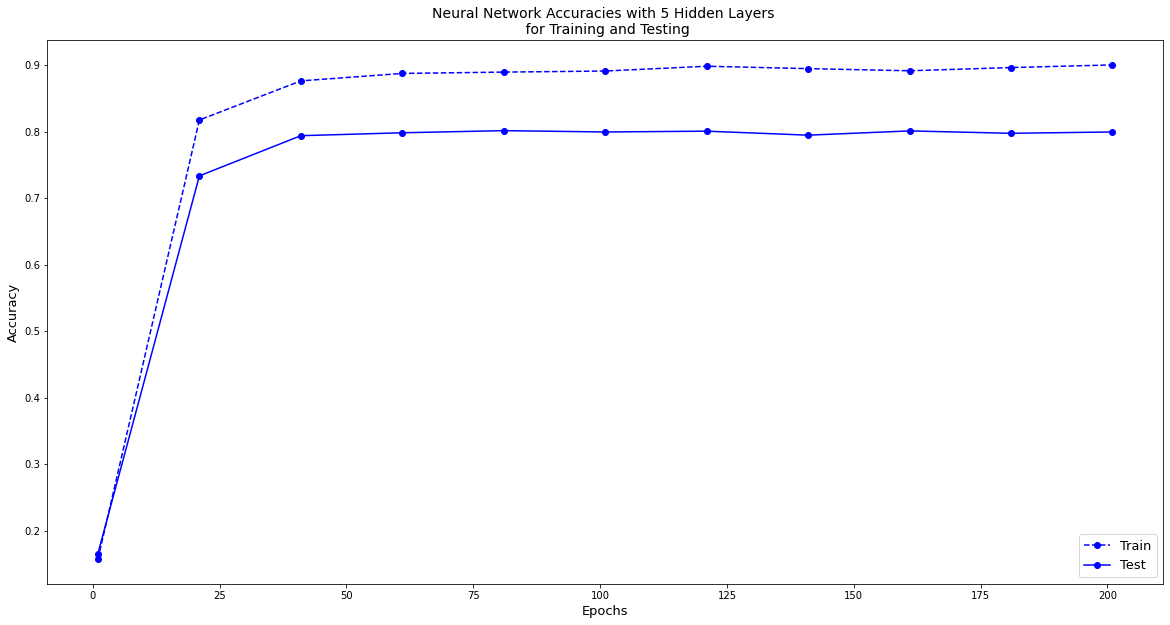

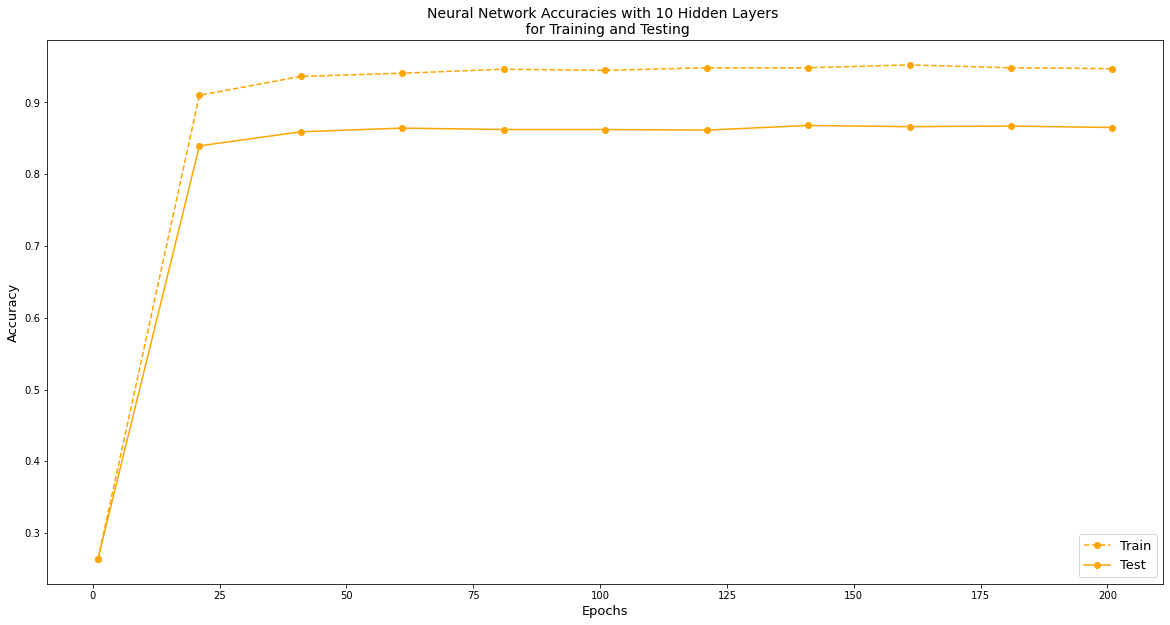

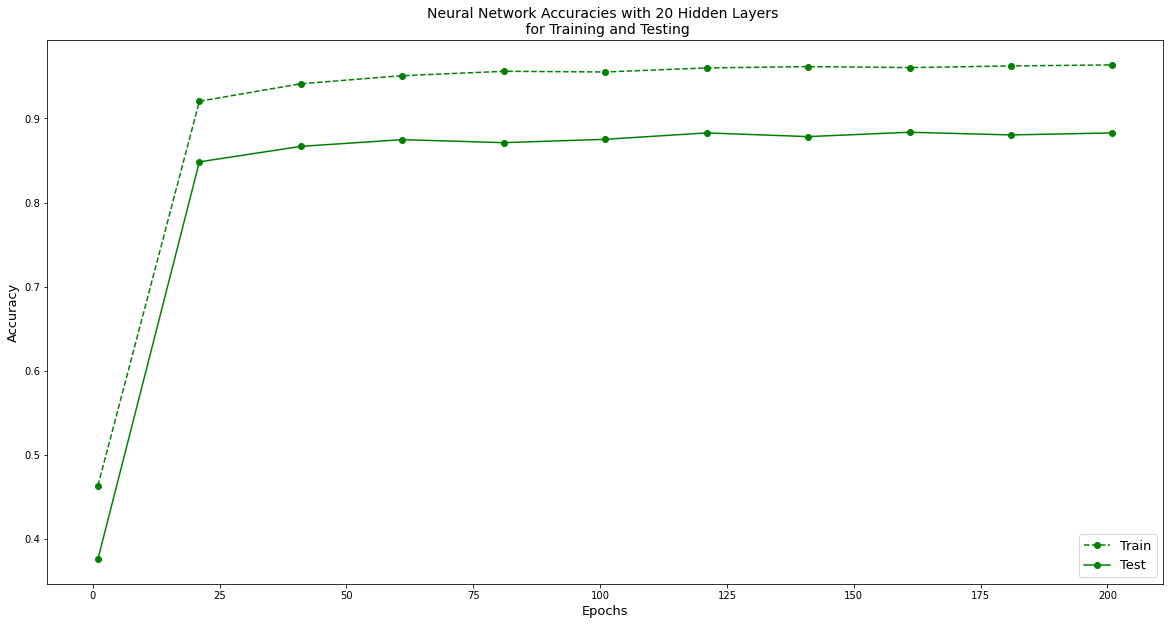

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
epochs_array = [i for i in range(1, 220, 20)]

plt.plot(epochs_array, nns[0].acc_train_array, label = "Train", marker='o', color= "blue", ls= 'dashed')
plt.plot(epochs_array, nns[0].acc_test_array, label = "Test", marker='o', color= "blue")
plt.title('Neural Network Accuracies with 5 Hidden Layers \n for Training and Testing', fontsize= 14)
plt.xlabel('Epochs', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
plt.plot(epochs_array, nns[1].acc_train_array, label = "Train", marker='o', color= "orange", ls= 'dashed')
plt.plot(epochs_array, nns[1].acc_test_array, label = "Test", marker='o', color= "orange")
plt.title('Neural Network Accuracies with 10 Hidden Layers \n for Training and Testing', fontsize= 14)
plt.xlabel('Epochs', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
plt.plot(epochs_array, nns[2].acc_train_array, label = "Train", marker='o', color= "green", ls= 'dashed')
plt.plot(epochs_array, nns[2].acc_test_array, label = "Test", marker='o', color= "green")
plt.title('Neural Network Accuracies with 20 Hidden Layers \n for Training and Testing', fontsize= 14)
plt.xlabel('Epochs', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.show()




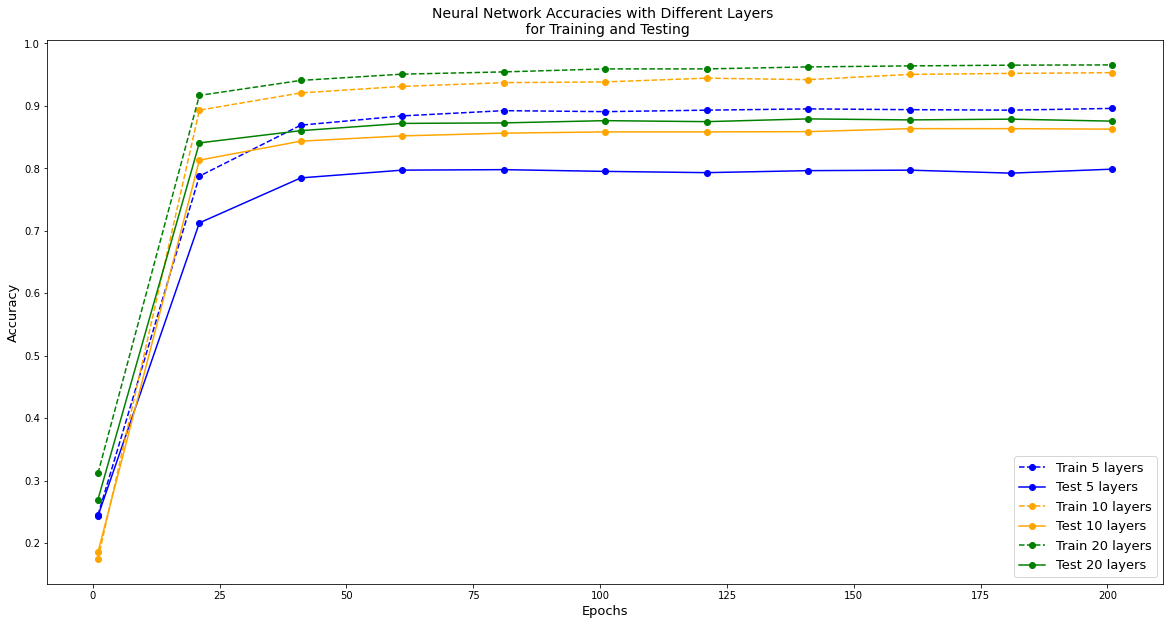

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
epochs_array = [i for i in range(1, 220, 20)]

plt.plot(epochs_array, nns[0].acc_train_array, label = "Train 5 layers", marker='o', color= "blue", ls= 'dashed')
plt.plot(epochs_array, nns[0].acc_test_array, label = "Test 5 layers", marker='o', color= "blue")
plt.plot(epochs_array, nns[1].acc_train_array, label = "Train 10 layers", marker='o', color= "orange", ls= 'dashed')
plt.plot(epochs_array, nns[1].acc_test_array, label = "Test 10 layers", marker='o', color= "orange")
plt.plot(epochs_array, nns[2].acc_train_array, label = "Train 20 layers", marker='o', color= "green", ls= 'dashed')
plt.plot(epochs_array, nns[2].acc_test_array, label = "Test 20 layers", marker='o', color= "green")
plt.title('Neural Network Accuracies with Different Layers \n for Training and Testing', fontsize= 14)
plt.xlabel('Epochs', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(loc="lower right", fontsize=13)
plt.show()

Give your explanation below.

If we look at the three graphs, the overall training and testing trends are similar for 5, 10 and 20 hidden layers in the neural network. In all three cases, there is a jump in accuracy right after the first epoch and throughout the epochs, the training accuracy is higher than the testing one. This is to be expected as the neural network is learning based on the training data. The regularization term used for training the model, $\lambda = 0.0001$, is small. Therefore it might not be big enough to penalize overfitting in favor of reducing generalization error.

We can also observe that after the jump, the accuracy change from one epoch to another is marginal as the number of epoch increases, showing that the model more or less stabilizes in its predictions, with very smooth up and down changes in accuracy, in particular in the training data. The accuracy levels are overall higher with 20 hidden layers, where after 200 epochs, the model reaches 0.87555 accuracy. In contrast, the model reaches 0.79872 and 0.86275 accuracy at the 200th epoch for 5 and 10 hidden layers, respectively. 

While adding more layers increases accuracy, the increase in accuracy from 10 to 20 hidden layers (ie. 0.86 to 0.87) is not as much as between 5 and 10 hidden layers (0.79 to 0.86). This could mean we are approximating (if not already reached) the vanishing gradient problem. That is, if we were to keep adding hidden layers, the model's performance will plateau without being able to continue learning and improving. Given the small changes in accuracy between 10 and 20 hidden layers, this may well be the case. As we add layers, we are not gaining much in accuracy. 

## Problem 4 - Tensors and Autograd.
In this problem, we will demonstrate the benefits of PyTorch's Autograd mechanics by converting your implementation from Problem to utilize PyTorch Tensors. This problem is not meant to be difficult, rather it should be quite simple once you've done Problem 3.

Note that there are *better* ways to go about this which we will cover next. Here. we are keeping things as close to numpy as possible on purpose to show what's going on behind the scenes. Take a moment to look through our modifications to get an understanding of the differences. In the comments, we'll make notes of native torch functions that perform the same operations. 

Here, SGD is implemented manually to show you what's going on behind the scenes, but  usually you'd use [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD). For future reference, the `weight_decay` parameter implements L2 normilazion. 

--- 

Before we move forward, let's cover a couple of points on notation. 

Just as it's best practice to do `import numpy as np`, PyTorch has best practices for imports as well:

```python
import torch 
import torch.nn as nn
import torch.nn.functional as F
```
You'll find that many of the functions you've been learning in NumPy have direct translations in PyTorch. The documentation can be found [here](https://pytorch.org/docs/stable/index.html) and is very user friendly, but we'll cover a few notable differences. 

- The numpy parameter `axis` becomes `dim` in PyTorch.
- Tensors have [view](https://pytorch.org/docs/stable/tensor_view.html) operations, which avoid copying data unnecasarily. Use these instead of `reshape()`. 
- Using `torch.from_numpy()` also avoids copying data stored in `numpy` arrays.
- Numpy interprets `np.dot()` of 2D matrices as matrix multiplication. Pytorch does not have this behaviour, see instead [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)
- PyTorch uses trailing underscores such as `torch.add_()` to denote in-place operations. As an example, the following operations are equivilent:
```python
x = x + y
x = torch.add(x, y)
x.add_(y)
```
You're likely to see these operations when randomly initializing Tensors, or filling a tensor with zeros:
```python
torch.nn.init.uniform_(x)
x.zero_()
```

---
Now onto the problem, your tasks are as follows:

1. Modify `forward_prop` to work on PyTorch Tensors.
2. Modify `SGD_step` to work on PyTorch Tensors. This is easier than it sounds, since with PyTorch we don't have to worry about calculating gradients manually.

In [132]:
import torch


class TorchNetwork(Network):
    def __init__(self, sizes, keep_prob=-1):
        super().__init__(sizes)
        
        # Convert your weights and biases to Tensors.
        # The flag requires_grad=True tells PyTorch to track gradients for us. 
        self.biases = [torch.tensor(b, requires_grad=True) for b in self.biases]
        self.weights = [torch.tensor(w, requires_grad=True) for w in self.weights]
        

    def g(self, z):
        """ Activation function
            Could also use torch.sigmoid(z)
        """
        return sigmoid_torch(z) 

    def forward_prop(self, a):
        """ Memory aware forward propagation. 
            Now this is for both training and testing.
        
        """
        # TODO: Convert your forward_prop function from part a to work on Tensors. 
        for w, b in zip(self.weights, self.biases):
            z = torch.matmul(w, a) + b 
            a = self.g(z)
        
        return a

    def cost(self, a, y):
        """ Cost function, same as F.mse_loss()
        """
        return ((a - y)**2).mean() 
            

    def SGD_step(self, x, y, eta, lam):
        """
            Performs a single step of SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        
        # Zero out the old gradients if they exist. 
        # Would be optim.zero_grad() if we were using an optimizer.
        for p in (*self.weights, *self.biases):
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()
            
        # TODO: 
        # (1) call forward_prop to get a. 
        # (2) Calculate loss using the cost function.
        # (3) Use loss.backward() to perform backpropagation automatically.

        a = self.forward_prop(x)
        loss = self.cost(a, y)
        loss.backward()

        # Perform sgd update 
        # Would be optimizer.step()
        with torch.no_grad():
            # l2 regularization on weights only.
            for p in self.weights:
                p.grad.add_(p, alpha=lam)
            # sgd update. 
            for p in (*self.weights, *self.biases):
                p.add_(p.grad, alpha=-eta)
                

def sigmoid_torch(z, threshold=20):
    """ Same as sigmoid before, now with torch.clamp() instead of np.clip().
        We could also just use torch.sigmoid().
    """
    z = torch.clamp(z, -threshold, threshold)
    return 1.0 / (1.0 + torch.exp(-z))


**Part 1 [14 points]:** Implement `SGD_step` and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [133]:
from tests import tests
tests.run_test_suite('new prob 4', TorchNetwork)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.760s

OK
